In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\heythere\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
tf.reset_default_graph() 

In [6]:
# DEFINE parameters
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = 98
neurons_hid4 = 49
neurons_hid5 = 25
neurons_hid6 = 12
neurons_hid7 = 6
neurons_hid8 = 3
neurons_hid9 = 2
neurons_hid10 = 1

learning_rate = 0.0003

In [7]:
# PINV(PSEUDO-INVERSE) function
def pinv(a, rcond=1e-15):
    s, u, v = tf.svd(a)
    # Ignore singular values close to zero to prevent numerical overflow
    limit = rcond * tf.reduce_max(s)
    non_zero = tf.greater(s, limit)

    reciprocal = tf.where(non_zero, tf.reciprocal(s), tf.zeros(s.shape))
    lhs = tf.matmul(v, tf.diag(reciprocal))
    return tf.matmul(lhs, u, transpose_b=True)

In [8]:
## PLACEHOLDER DEFINATION
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [9]:
# TRANSPOSE OR PINV
tie_weight = tf.transpose #pinv

In [10]:
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs,neurons_hid1]), dtype=tf.float32)
w1_ = tie_weight(w1)
b1 = tf.Variable(tf.zeros([neurons_hid1]))

In [11]:
# ACTIVATION FUNCTION  [ lambda X:X  <OR>  tf.nn.relu  ]
# act_func = lambda X:X
act_func = tf.nn.relu

In [12]:
# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1)+b1)
output_layer = tf.matmul(hid_layer1, w1_)

In [13]:
# LOSS FUNCTIONS
loss = tf.reduce_mean(tf.square(output_layer - X))
# loss = tf.reduce_mean(tf.abs(output_layer - X))
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=yout))

In [15]:
# TRAINING
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss, var_list=[w1, b1])

In [16]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [21]:
num_epochs = 100
batch_size = 150

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: X_batch})

            training_loss = loss.eval(feed_dict={X: X_batch})   
            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
            saver.save(sess, "./save/ae_1_relu.ckpt")      
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Loss: 0.00703484145924449
Epoch 1 Complete. Training Loss: 0.004859248176217079
Epoch 2 Complete. Training Loss: 0.003829709952697158
Epoch 3 Complete. Training Loss: 0.0030158180743455887
Epoch 4 Complete. Training Loss: 0.0024550354573875666
Epoch 5 Complete. Training Loss: 0.0018937268760055304
Epoch 6 Complete. Training Loss: 0.0015294362092390656
Epoch 7 Complete. Training Loss: 0.0011094494257122278
Epoch 8 Complete. Training Loss: 0.0010642961133271456
Epoch 9 Complete. Training Loss: 0.0007657624664716423
Epoch 10 Complete. Training Loss: 0.0007014225120656192
Epoch 11 Complete. Training Loss: 0.0005767383845523
Epoch 12 Complete. Training Loss: 0.0005265063373371959
Epoch 13 Complete. Training Loss: 0.0005269250250421464
Epoch 14 Complete. Training Loss: 0.0005042410339228809
Epoch 15 Complete. Training Loss: 0.000530115095898509
Epoch 16 Complete. Training Loss: 0.0004512513696681708
Epoch 17 Complete. Training Loss: 0.0003965772921219468
Epoch 18 C

In [22]:
num_test_images = 10
start_point = 15
with tf.Session() as sess:
    
    saver.restore(sess,"./save/ae_1_relu.ckpt")
    
    results,compressed = sess.run([output_layer, hid_layer1],
                                  feed_dict={X:mnist.test.images[start_point:num_test_images+start_point]})
    weight1 = w1.eval()
    biases1 = b1.eval()

INFO:tensorflow:Restoring parameters from ./save/ae_1_relu.ckpt


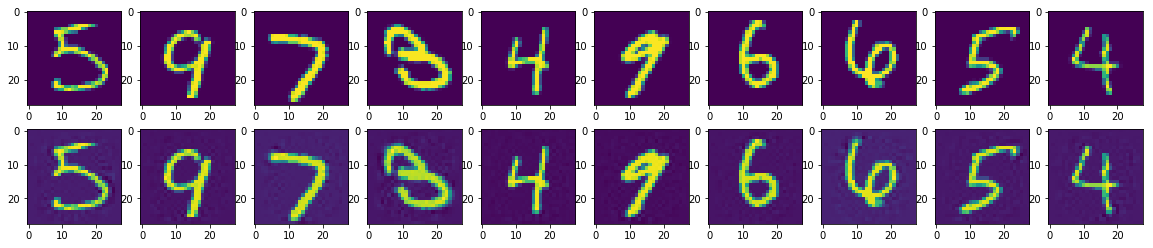

In [23]:
# ORIGINAL VS RECONSTRUCTED
f, a = plt.subplots(2, num_test_images, figsize=(20, 4))
for i in range(start_point,num_test_images+start_point):
    j = i-start_point
    a[0][j].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][j].imshow(np.reshape(results[j], (28, 28)))

In [25]:
np.set_printoptions(precision=3, suppress=True)
print(biases1)

[ 0.813  0.863  0.729  0.226  0.574  0.244  0.759  0.815  0.732  0.202
  0.824  0.746  0.552  0.133  0.959  0.118  0.949  0.867  0.754  0.592
  0.464  1.007  0.83   0.281  0.569  0.135  0.988  0.483  0.178  0.963
  0.346  0.451  0.394  0.365  0.516  0.993  1.011  0.401  0.069  0.506
  0.8    0.528  0.305  0.188  0.808  0.143  0.312  0.501  0.672  0.652
  0.046  0.899  1.041  0.718  0.429  0.502  0.747  0.799  1.058  0.806
  0.344  0.191  0.835  0.738  0.636  0.334  0.091  0.497  0.374  0.716
  0.486  0.84   0.106  0.205  0.366  1.024  0.883  0.858  0.738  1.011
  0.131  0.935  0.72   1.03   0.784  0.975  0.947  0.835  0.858  0.127
  0.192  0.906  0.945  0.614  0.566  0.163  1.037  0.1    0.547  0.617
  0.752 -0.005  0.825  0.912  0.396  0.174  0.745  0.84   0.281  0.77
  0.05   0.224  0.681  0.689  0.129  0.115  0.418  0.514  0.147  0.999
  0.954  0.883  0.938  0.073  0.827  0.916  0.546  0.007  0.221  0.878
  0.385  0.722  0.89   0.497  0.276  0.487  0.129  0.827  0.597  0.967
  0.152

In [28]:
# np.save('./save/weights/w1.npy',weight1)
#wt1 = np.load('./save/weights/w1.npy')